<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6823/NGC_6823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [0]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

In [0]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 1.4MB/s 
     |████████████████████████████████| 2.3MB 37.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=6cd4c3ec7e59775e2418a4fda862fca73e6dd05a59f4dcbf2fa894c4d9e8a661
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [0]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [0]:
## making a GAIA cone_search of 30m radius around NGC3293 center

coordinate = coord.SkyCoord.from_name('NGC3293')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (158.9645, -58.2299)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [0]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 5351448509739996672',5351448509739996672,354450650,2015.5,158.966442,0.402732,-58.228845,0.337860,0.639476,0.394748,1.619957,-7.465475,0.835607,9.179791,0.692492,-0.096833,-0.116379,-0.228415,0.567954,0.158877,0.618239,0.002767,-0.111936,0.311020,-0.143644,159,0,159,0,5.612147,274.002319,1.341826,4.713380,31,False,0.170358,1.507330,0.071245,-0.193819,...,884.536487,30.505997,28.995495,17.395130,4.080298,0,0.429981,-1.187950,1.617931,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.857386,0.075644,198.537057,-58.779177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001468
1,1635721458409799680,b'Gaia DR2 5351448505437777280',5351448505437777280,3140375,2015.5,158.965521,0.034032,-58.227546,0.035259,0.340286,0.043593,7.806006,-7.750376,0.070863,3.108346,0.073514,0.222115,-0.387199,0.062676,0.209676,0.051695,0.373335,0.037221,-0.113833,0.263384,0.135983,186,151,184,2,10.521373,459.741333,0.000000,0.000000,31,False,202.741119,1.751290,0.007475,-0.151637,...,76174.406732,121.299030,627.988586,12.557397,1.192920,1,0.173354,0.035826,0.137528,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.856319,0.076531,198.534608,-58.778618,100002.0,9283.5,8456.250000,9696.0,0.7537,0.6924,0.8717,0.379,0.3416,0.4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002418
2,1635721458409799680,b'Gaia DR2 5351448509737486720',5351448509737486720,983253136,2015.5,158.962275,0.978578,-58.232061,0.831034,1.667673,0.849032,1.964205,-8.748307,1.592512,2.003534,1.439778,-0.427076,-0.535006,-0.582979,0.639860,0.339128,0.691298,-0.178306,0.372545,-0.320295,-0.235340,107,0,105,2,4.658142,180.410614,2.030757,2.985573,31,False,0.055658,1.240493,0.158372,-0.197764,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.857077,0.071763,198.538548,-58.782993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002458
3,1635721458409799680,b'Gaia DR2 5351448509754722176',5351448509754722176,1432604509,2015.5,158.968555,0.056884,-58.228642,0.063714,0.384640,0.066424,5.790663,-4.738234,0.117419,0.907908,0.113144,0.196161,-0.138369,-0.004536,0.475916,0.350527,0.614732,0.319362,0.347650,0.271754,0.347514,205,0,203,2,1.388232,226.200851,0.000000,0.000000,31,False,4.934465,1.490567,0.012455,-0.029576,...,4258.671222,39.401268,108.084625,15.688735,1.472335,0,1.185391,0.333925,0.851466,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.858250,0.076372,198.538274,-58.778239,102001.0,5003.0,4435.729980,5508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.in

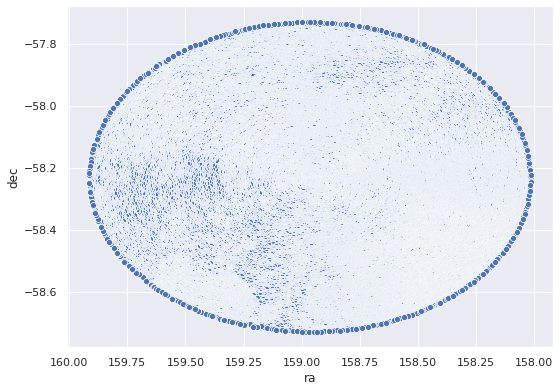

In [0]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [0]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [0]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [0]:
## saving only NGC 3293 data from Cantat

cantat_3293 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_3293")
cantat_3293 = cantat_3293[0].to_pandas()
cantat_3293

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,159.138841,-58.342722,5350695138128318464,0.3842,-7.552,3.372,NaN,14.623600,0.5547,0.9,b'NGC_3293',159.138903,-58.342736
1,159.028629,-58.310262,5350696134560589440,0.3524,-7.774,3.379,NaN,13.557100,0.5473,1.0,b'NGC_3293',159.028693,-58.310277
2,158.996248,-58.286858,5350696203280067456,0.3767,-7.613,3.342,NaN,17.210699,1.3604,0.9,b'NGC_3293',158.996310,-58.286873
3,159.057697,-58.318124,5350695928402160000,0.4028,-7.770,3.212,NaN,13.081900,0.5480,0.9,b'NGC_3293',159.057761,-58.318138
4,159.064112,-58.309625,5350696031481376384,0.3650,-7.933,2.758,NaN,17.822201,1.4310,0.2,b'NGC_3293',159.064177,-58.309637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,159.027317,-58.097191,5351543411342576128,0.4411,-8.072,3.098,NaN,17.899300,1.1319,0.1,b'NGC_3293',159.027382,-58.097205
653,159.091837,-58.115276,5351543170824427520,0.4172,-7.331,2.746,NaN,17.134701,1.2670,0.3,b'NGC_3293',159.091896,-58.115288
654,159.110404,-58.048860,5351545198049116416,0.4093,-7.743,3.719,NaN,14.627900,0.5725,0.1,b'NGC_3293',159.110467,-58.048876
655,158.957864,-58.034643,5351544712700452224,0.3125,-7.104,3.262,NaN,15.681900,1.0012,0.1,b'NGC_3293',158.957922,-58.034657


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_3293 = cantat_3293.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_3293 = cantat_3293.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_3293 = all_stars.join(cantat_3293.set_index('source_id'), on='source_id')

In [0]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_3293 = cantat_3293.dropna(subset=['PMemb'])
cantat_3293

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
1,1635721458409799680,b'Gaia DR2 5351448505437777280',5351448505437777280,3140375,2015.5,158.965521,0.034032,-58.227546,0.035259,0.340286,0.043593,7.806006,-7.750376,0.070863,3.108346,0.073514,0.222115,-0.387199,0.062676,0.209676,0.051695,0.373335,0.037221,-0.113833,0.263384,0.135983,186,151,184,2,10.521373,459.741333,0.000000,0.000000,31,False,202.741119,1.751290,0.007475,-0.151637,...,121.299030,627.988586,12.557397,1.192920,1,0.173354,0.035826,0.137528,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.856319,0.076531,198.534608,-58.778618,100002.0,9283.500000,8456.250000,9696.0,0.7537,0.6924,0.8717,0.3790,0.3416,0.4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002418,0.7
4,1635721458409799680,b'Gaia DR2 5351448505437778944',5351448505437778944,303552022,2015.5,158.969396,0.028302,-58.229695,0.031075,0.354195,0.033926,10.440279,-7.802339,0.057370,3.477494,0.058180,0.144333,-0.262161,-0.034152,0.390638,0.277028,0.503060,0.262631,0.130758,0.205974,0.220043,195,0,194,1,0.060137,189.502975,0.000000,0.000000,31,False,26.036049,1.666782,0.006589,-0.054407,...,86.393117,152.005554,14.466073,1.248456,0,0.545363,0.152836,0.392528,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.859158,0.075678,198.540326,-58.778657,100001.0,7020.000000,6668.149902,7416.0,1.0400,0.6060,1.2281,0.4910,0.2980,0.6231,200111.0,1.742998,1.561822,1.931792,6.647169,5.145604,8.148735,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002579,1.0
10,1635721458409799680,b'Gaia DR2 5351448509755016832',5351448509755016832,703038847,2015.5,158.970899,0.029118,-58.230469,0.033808,0.454872,0.033128,13.730590,-7.717534,0.051471,3.097018,0.078334,0.340956,-0.471364,-0.138466,0.559348,-0.183651,0.401089,0.553890,0.138295,-0.353948,0.195733,161,0,161,0,-0.439614,147.719208,0.000000,0.000000,31,False,44.724674,1.703719,0.006821,-0.152838,...,59.034092,330.432251,14.036457,1.213447,1,0.357455,0.095725,0.261730,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.860229,0.075399,198.542460,-58.778630,100002.0,8456.000000,8071.000000,8950.0,0.5280,0.2500,0.7901,0.2665,0.0687,0.3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.003409,0.6
30,1635721458409799680,b'Gaia DR2 5351448509754734592',5351448509754734592,156022494,2015.5,158.972180,0.116942,-58.224882,0.084230,0.402255,0.075814,5.305788,-7.716303,0.210414,3.712036,0.170181,0.681209,0.119034,0.440693,0.653867,0.442460,0.646801,0.509852,0.362031,0.261865,0.716695,95,0,95,0,5.695930,188.993225,0.226075,3.690067,31,False,9.611168,1.596149,0.017989,-0.134833,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',285.858042,0.080584,198.535649,-58.774248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

# cantat_3293.to_csv('NGC_3293_cantat.csv')
# all_stars.to_csv('NGC_3293_Gaia_30m.csv')

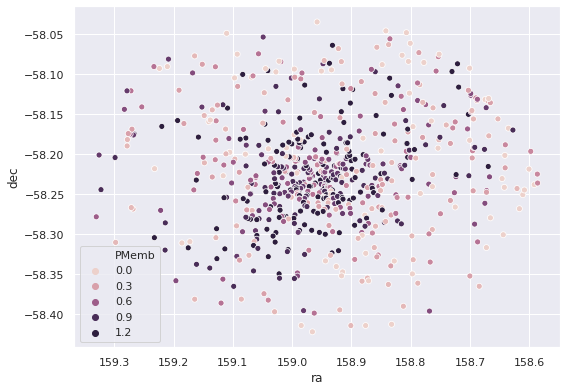

In [0]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_3293['ra'], cantat_3293['dec'], hue = cantat_3293['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_3293

In [0]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,6.570000e+02,6.570000e+02,6.570000e+02,657.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,...,644.000000,657.000000,6.430000e+02,643.000000,643.000000,643.000000,643.000000,657.000000,643.000000,644.000000,643.000000,4.000000,4.000000,657.000000,4.000000,4.000000,4.0,657.000000,657.000000,657.000000,657.000000,547.000000,547.000000,547.000000,547.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,657.000000,657.000000
mean,1.635721e+18,5.351259e+18,8.459542e+08,2015.5,158.942605,0.046888,-58.222078,0.045432,0.375559,0.053816,9.211734,-7.579446,0.090480,3.316290,0.087269,-0.035684,-0.273600,-0.288415,0.273082,0.179667,0.348368,-0.075877,0.192262,0.109215,0.054626,201.315068,28.508371,199.913242,1.401826,2.079310,257.557190,0.062986,1.140634,31.0,54.498562,1.603957,0.010903,-0.019380,23.095890,14.337900,...,15.155667,21.511416,3.005620e+05,1326.075333,397.085999,14.322553,1.310319,0.126332,0.829122,0.281754,0.546547,-4.272901,1.939050,0.044140,5125.000000,3.750000,0.0,285.843161,0.075211,198.510890,-58.783425,100253.471664,6661.978027,6314.110840,7027.157715,0.885490,0.592999,1.156775,0.444862,0.295824,0.579638,200111.0,4.597406,4.195796,5.021255,204.749573,168.066177,241.432709,0.089502,0.603501
std,0.000000e+00,3.270430e+14,4.930411e+08,0.0,0.143577,0.030942,0.072565,0.029880,0.056253,0.034409,4.397087,0.302690,0.058425,0.269758,0.055127,0.135906,0.134936,0.138086,0.111684,0.137960,0.109500,0.168909,0.123800,0.127259,0.141902,30.910270,67.492323,30.967973,2.159041,5.117659,171.945251,0.140490,4.862920,0.0,90.042427,0.107520,0.006674,0.067167,3.506735,1.861429,...,2.219551,6.405048,3.144800e+06,18092.972128,297.010712,1.847364,0.168320,0.375537,0.490797,0.231772,0.301971,16.832975,2.896037,0.614509,478.713562,0.866025,0.0,0.077013,0.071091,0.147737,0.071577,664.822018,1720.152100,1622.868652,1746.919678,0.403381,0.383075,0.449908,0.203625,0.190648,0.229590,0.0,32.267616,30.286135,35.228199,3162.824707,2605.815430,3719.859619,0.056176,0.334687
min,1.635721e+18,5.350689e+18,4.845840e+05,2015.5,158.586102,0.016119,-58.422563,0.014866,0.249344,0.017534,1.506647,-8.527944,0.030638,2.396999,0.029315,-0.656215,-0.756654,-0.869462,-0.153854,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-0.569122,61.000000,0.000000,61.

In [0]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

rv_template_teff                  -0.838659
g_rp                              -0.554589
bp_rp                             -0.531959
rv_template_logg                  -0.529813
astrometric_pseudo_colour_error   -0.482145
                                     ...   
teff_percentile_upper              0.440437
teff_val                           0.440711
teff_percentile_lower              0.444662
astrometric_pseudo_colour          0.538742
PMemb                              1.000000
Name: PMemb, Length: 88, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_3293_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_3293_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [0]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_3293_center
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,158.942505,-58.222157,0.045817,0.044321,0.375665,0.052849,9.306356,-7.576845,0.088495,3.313400,0.085209,14.869098,0.829122,0.135133
std,0.144170,0.073009,0.029412,0.027713,0.056194,0.033073,4.383965,0.302626,0.055775,0.269602,0.051408,2.092204,0.490797,0.091495
min,158.586105,-58.422562,0.016119,0.014866,0.249344,0.017534,1.506647,-8.527944,0.030638,2.396999,0.029315,6.145422,-0.052575,0.002566
25%,158.855133,-58.265715,0.026681,0.025679,0.340294,0.030777,5.932256,-7.769126,0.051630,3.187229,0.050599,13.731419,0.396565,0.056801
50%,158.947723,-58.225739,0.035215,0.034537,0.379390,0.040773,9.074924,-7.626803,0.067837,3.320309,0.067880,15.125911,0.828105,0.118065
75%,159.028328,-58.179317,0.053679,0.050725,0.411625,0.060862,12.380352,-7.396237,0.103219,3.456806,0.097704,16.359799,1.212735,0.194140
max,159.330231,-58.034645,0.223858,0.203714,0.505008,0.238407,26.068220,-6.732379,0.396736,4.291730,0.343023,17.996614,2.529253,0.378452


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

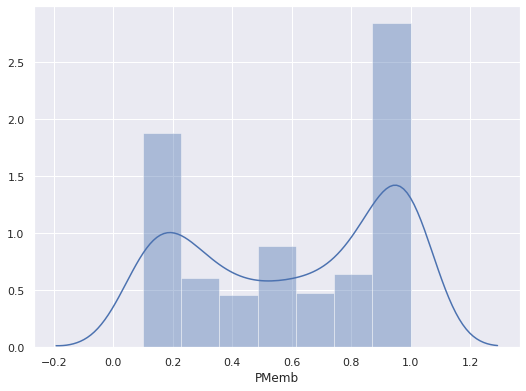

In [0]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [0]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

400

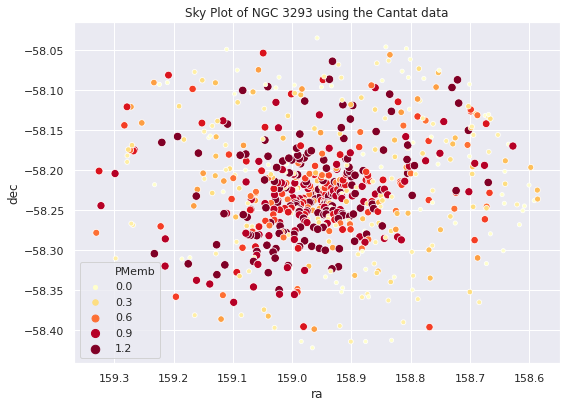

In [0]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 3293 using the Cantat data')
plt.show()

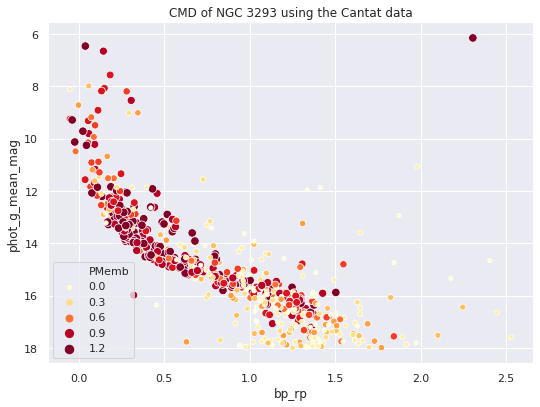

In [0]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 3293 using the Cantat data')
plt.show()

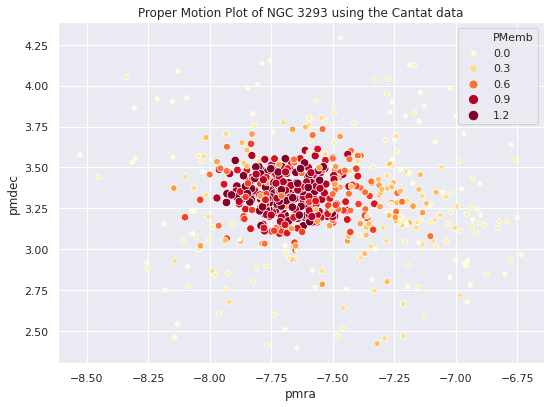

In [0]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 3293 using the Cantat data')
plt.show()

In [0]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra                   0.417515
pmdec                  0.239098
bp_rp                  0.120171
ra_error               0.038174
parallax_error         0.029185
pmdec_error            0.028731
parallax               0.025832
dec_error              0.021608
phot_g_mean_mag        0.018683
dist_3293_center       0.015777
pmra_error             0.015618
dec                    0.011932
parallax_over_error    0.008881
ra                     0.008796
dtype: float64

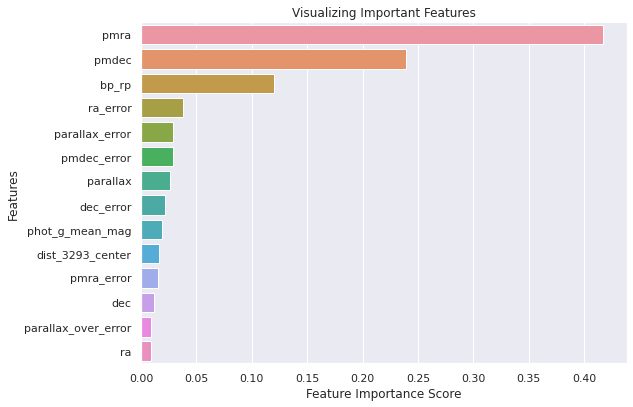

In [0]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [0]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.8369102752975364

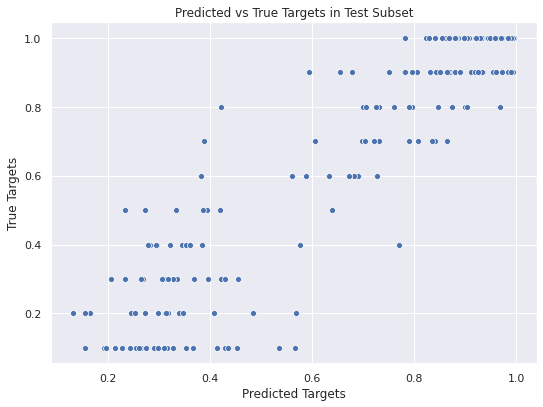

In [0]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [0]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [0]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.4854598316983135, 0.625469058881151, 0.6822783637142154, 0.7266861189031545, 0.7402282762399204, 0.7697527894193612, 0.7903606155898272, 0.805853634783746, 0.8092886133511031, 0.8260027857209226, 0.8240071716237936, 0.8300409047392611, 0.8392001633402668, 0.8416241238141225, 0.8464080998701975, 0.838859742740574, 0.8514574010179446, 0.854946170109786, 0.8528710668708758]


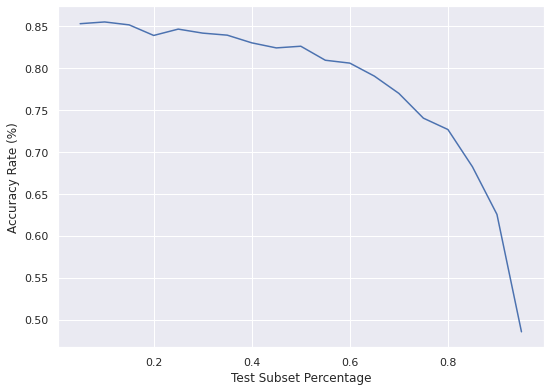

In [0]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [0]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,1.182190e+05,1.182190e+05,1.182190e+05,118219.0,118219.000000,118219.000000,118219.000000,118219.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,118219.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,103523.000000,118219.000000,118219.000000,118219.000000,118219.000000,118219.000000,1.182190e+05,118219.000000,118219.000000,118219.000000,118219.000000,103348.000000,103348.000000,118219.000000,118219.000000,118219.000000,...,95269.000000,95269.000000,118219.000000,9.529400e+04,95294.000000,95294.000000,95294.000000,95224.000000,118219.000000,95224.000000,95269.000000,95294.000000,551.000000,551.000000,118219.000000,551.000000,551.000000,551.000000,118219.000000,118219.000000,118219.000000,118219.000000,15079.000000,15079.000000,15079.000000,15079.000000,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000,8728.0,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,118219.000000
mean,1.635721e+18,5.351209e+18,8.454132e+08,2015.5,158.847814,0.942561,-58.256071,0.831010,0.361265,0.500780,2.960627,-6.473450,0.915206,2.975598,0.838551,-0.074013,-0.211448,-0.178100,0.169668,0.241397,0.219768,-0.072887,0.126677,0.088365,0.012077,185.041398,1.751622,183.970005,1.071393,3.547511,8.404493e+02,1.134513,22.753551,27.519274,3.898868,1.407550,0.105734,-0.000481,21.347931,13.577301,...,60.344566,18.918623,17.044282,8.829782e+03,49.704288,96.229630,17.500065,2.293957,0.164407,1.419339,0.108147,1.311155,10.172628,2.698638,0.025597,5191.106934,3.345735,-0.095735,285.817383,0.020380,198.492297,-58.842551,100799.338882,5137.054688,4894.524902,5473.902344,0.904340,0.676139,1.170756,0.451025,0.335852,0.585471,200111.0,2.582213,2.321352,2.791356,19.813135,16.594971,23.031330,0.338111
std,0.000000e+00,3.491579e+14,4.891628e+08,0.0,0.464798,2.286874,0.253429,1.736936,0.988524,0.471525,7.768974,4.094194,0.876759,3.140686,0.803641,0.259542,0.165166,0.216430,0.152488,0.182794,0.163847,0.228712,0.181195,0.152395,0.214121,62.071046,19.186810,61.810812,1.615184,14.497807,3.188649e+04,1.827640,718.347260,9.238269,25.219990,0.175343,0.096080,0.109959,6.897523,3.361745,...,165.632980,1.544807,10.538448,3.334270e+05,2210.157421,213.294296,1.479095,0.930502,0.525119,0.465230,0.575553,0.417775,26.383255,3.429756,0.409092,693.890930,0.485961,0.366215,0.230294,0.266461,0.444537,0.266658,3614.914414,1028.697144,1006.104980,1072.157104,0.723206,0.703007,0.754909,0.365321,0.353527,0.383938,0.0,7.541842,6.973819,8.169261,610.396912,505.663849,715.408081,0.119112
min,1.635721e+18,5.350658e+18,8.026100e+0

In [0]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_3293_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [0]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


797

In [0]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

797

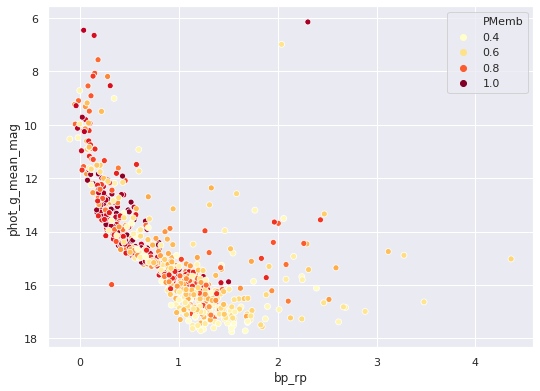

In [0]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

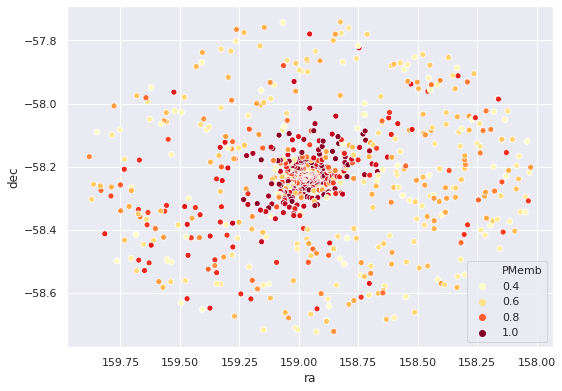

In [0]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

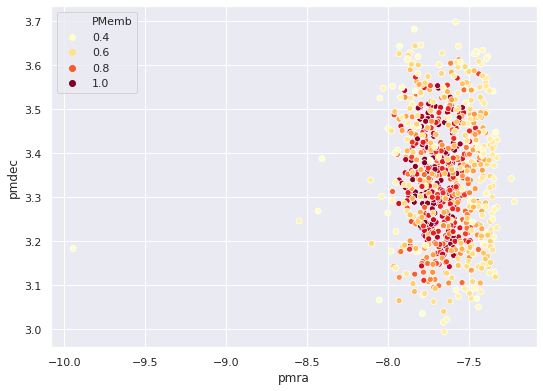

In [0]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [0]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_3293_center,PMemb
count,7.970000e+02,7.970000e+02,7.970000e+02,797.0,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.0,797.000000,797.000000,797.000000,797.000000,797.000000,797.00000,...,797.000000,7.970000e+02,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,9.000000,9.000000,797.000000,9.000000,9.000000,9.0,797.000000,797.000000,797.000000,797.000000,734.000000,734.000000,734.000000,734.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,797.000000,797.000000,797.000000
mean,1.635721e+18,5.351202e+18,8.482342e+08,2015.5,158.923683,0.038139,-58.238293,0.036793,0.374860,0.044417,10.295497,-7.648443,0.074680,3.341863,0.072206,-0.034093,-0.269720,-0.266194,0.214666,0.186072,0.281070,-0.086163,0.193419,0.075708,0.084115,216.496863,30.514429,215.125471,1.371393,2.178254,287.024109,0.044145,1.486351,31.0,54.600254,1.604103,0.009391,0.002543,24.789210,15.02133,...,23.861982,2.871393e+05,1195.930304,439.504822,14.228852,1.278686,0.095358,0.860691,0.330221,0.530470,0.858084,1.820014,0.082811,4922.222168,3.222222,0.0,285.842709,0.055739,198.520242,-58.801786,100219.128065,6491.548340,6152.221191,6849.808594,0.910598,0.641899,1.152311,0.455635,0.319020,0.577256,200111.0,4.251529,3.849062,4.639773,170.613846,141.504028,199.723373,0.212403,0.322390,0.755453
std,0.000000e+00,3.542723e+14,4.778961e+08,0.0,0.372285,0.017674,0.180695,0.016612,0.140167,0.020332,6.498064,0.188635,0.034393,0.138671,0.032513,0.119826,0.122102,0.140300,0.120558,0.122863,0.125767,0.164564,0.116432,0.119020,0.128498,31.567970,71.413080,31.638533,1.881565,5.979302,326.718750,0.105542,10.364179,0.0,89.123581,0.111908,0.004366,0.072819,3.563598,1.72647,...,5.578451,3.031176e+06,16557.734748,303.813721,1.744042,0.112965,0.293893,0.565077,0.292459,0.294116,18.052543,1.709012,0.875787,718.988525,0.506897,0.0,0.201000,0.175060,0.383340,0.177830,878.157537,1754.370361,1650.303711,1782.175049,0.523145,0.516225,0.531748,0.262807,0.259946,0.270417,0.0,29.016558,27.177555,31.651743,2738.249512,2259.540039,3217.242920,0.162550,0.262525,0.156482
min,1.635721e+18,5.350658e+18,4.845840e+05,2015.5,158.025421,0.014661,-58.724262,0.014447,-0.169508,0.017534,-3.161400,-9.945305,0.028895,2.994402,0.026890,-0.853866,-0.736077,-0.869462,-0.263703,-0.392337,-0.209384,-0.718883,-0.403376,-0.576839,-0.555678,71.000000,0.000000,70.00

In [0]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_3293_center
count,6.570000e+02,6.570000e+02,6.570000e+02,657.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.0,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,...,657.000000,6.430000e+02,643.000000,643.000000,643.000000,643.000000,657.000000,643.000000,644.000000,643.000000,4.000000,4.000000,657.000000,4.000000,4.000000,4.0,657.000000,657.000000,657.000000,657.000000,547.000000,547.000000,547.000000,547.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,657.000000,657.000000,657.000000
mean,1.635721e+18,5.351259e+18,8.459542e+08,2015.5,158.942605,0.046888,-58.222078,0.045432,0.375559,0.053816,9.211734,-7.579446,0.090480,3.316290,0.087269,-0.035684,-0.273600,-0.288415,0.273082,0.179667,0.348368,-0.075877,0.192262,0.109215,0.054626,201.315068,28.508371,199.913242,1.401826,2.079310,257.557190,0.062986,1.140634,31.0,54.498562,1.603957,0.010903,-0.019380,23.095890,14.337900,...,21.511416,3.005620e+05,1326.075333,397.085999,14.322553,1.310319,0.126332,0.829122,0.281754,0.546547,-4.272901,1.939050,0.044140,5125.000000,3.750000,0.0,285.843161,0.075211,198.510890,-58.783425,100253.471664,6661.978027,6314.110840,7027.157715,0.885490,0.592999,1.156775,0.444862,0.295824,0.579638,200111.0,4.597406,4.195796,5.021255,204.749573,168.066177,241.432709,0.089502,0.603501,0.134370
std,0.000000e+00,3.270430e+14,4.930411e+08,0.0,0.143577,0.030942,0.072565,0.029880,0.056253,0.034409,4.397087,0.302690,0.058425,0.269758,0.055127,0.135906,0.134936,0.138086,0.111684,0.137960,0.109500,0.168909,0.123800,0.127259,0.141902,30.910270,67.492323,30.967973,2.159041,5.117659,171.945251,0.140490,4.862920,0.0,90.042427,0.107520,0.006674,0.067167,3.506735,1.861429,...,6.405048,3.144800e+06,18092.972128,297.010712,1.847364,0.168320,0.375537,0.490797,0.231772,0.301971,16.832975,2.896037,0.614509,478.713562,0.866025,0.0,0.077013,0.071091,0.147737,0.071577,664.822018,1720.152100,1622.868652,1746.919678,0.403381,0.383075,0.449908,0.203625,0.190648,0.229590,0.0,32.267616,30.286135,35.228199,3162.824707,2605.815430,3719.859619,0.056176,0.334687,0.091316
min,1.635721e+18,5.350689e+18,4.845840e+05,2015.5,158.586102,0.016119,-58.422563,0.014866,0.249344,0.017534,1.506647,-8.527944,0.030638,2.396999,0.029315,-0.656215,-0.756654,-0.869462,-0.153854,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-0.569122,61.000000,0.000000,61.0

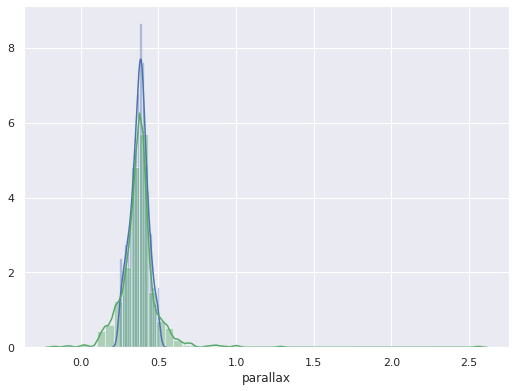

In [0]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_3293_membership_prob.csv')
# potential_member.to_csv('potential.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [0]:
concatenated

,PMemb,a_g_percentile_lower,a_g_percentile_upper,a_g_val,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_gof_al,astrometric_matched_observations,astrometric_n_bad_obs_al,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_params_solved,astrometric_primary_flag,astrometric_pseudo_colour,astrometric_pseudo_colour_error,astrometric_sigma5d_max,astrometric_weight_al,b,bp_g,bp_rp,datalink_url,dataset,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,designation,dist,dist_3293_center,duplicated_source,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,e_bp_min_rp_val,ecl_lat,ecl_lon,epoch_photometry_url,flame_flags,...,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_g_n_obs,phot_proc_mode,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,priam_flags,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,radial_velocity,radial_velocity_error,radius_percentile_lower,radius_percentile_upper,radius_val,random_index,ref_epoch,rv_nb_transits,rv_template_fe_h,rv_template_logg,rv_template_teff,solution_id,source_id,teff_percentile_lower,teff_percentile_upper,teff_val,visibility_periods_used
1,0.720,0.6924,0.8717,0.7537,459.741333,0.000000,0.000000,10.521373,21,2,184,151,186,31,False,1.751290,0.007475,0.052266,202.741119,0.076531,0.035826,0.173354,b'https://gea.esac.esa.int/data-server/datalin...,New_member,-58.227546,0.035259,0.051695,0.037221,0.373335,b'Gaia DR2 5351448505437777280',0.002418,0.002566,False,0.3416,0.4556,0.3790,-58.778618,198.534608,b'',NaN,...,46.036985,3421.916504,12.694925,210,1,76174.406732,121.299030,627.988586,12.557397,12,b'NOT_AVAILABLE',3.108346,0.073514,-7.750376,0.070863,0.135983,100002.0,158.965521,0.222115,0.034032,-0.387199,0.209676,0.062676,NaN,NaN,NaN,NaN,NaN,3140375,2015.5,0,NaN,NaN,NaN,1635721458409799680,5351448505437777280,8456.250000,9696.000000,9283.500000,11
4,0.989,0.6060,1.2281,1.0400,189.502975,0.000000,0.000000,0.060137,22,1,194,0,195,31,False,1.666782,0.006589,0.069819,26.036049,0.075678,0.152836,0.545363,b'https://gea.esac.esa.int/data-server/datalin...,New_member,-58.229695,0.031075,0.277028,0.262631,0.503060,b'Gaia DR2 5351448505437778944',0.002579,0.004900,False,0.2980,0.6231,0.4910,-58.778657,198.540326,b'',200111.0,...,10.671148,2012.309326,14.858601,223,0,13132.233682,86.393117,152.005554,14.466073,16,b'NOT_AVAILABLE',3.477494,0.058180,-7.802339,0.057370,0.220043,100001.0,158.969396,0.144333,0.028302,-0.262161,0.390638,-0.034152,NaN,NaN,1.561822,1.931792,1.742998,303552022,2015.5,0,NaN,NaN,NaN,1635721458409799680,5351448505437778944,6668.149902,7416.000000,7020.000000,13
10,0.655,0.2500,0.7901,0.5280,147.719208,0.000000,0.000000,-0.439614,18,0,161,0,161,31,False,1.703719,0.006821,0.088930,44.724674,0.075399,0.095725,0.357455,b'https://gea.esac.esa.int/data-server/datalin...,New_member,-58.230469,0.033808,-0.183651,0.553890,0.401089,b'Gaia DR2 5351448509755016832',0.003409,0.006424,False,0.0687,0.3920,0.2665,-58.778630,198.542460,b'',NaN,...,14.608062,2463.081055,14.298187,174,1,19506.768079,59.034092,330.432251,14.036457,16,b'NOT_AVAILABLE',3.097018,0.078334,-7.717534,0.051471,0.195733,100002.0,158.970899,0.340956,0.029118,-0.471364,0.559348,-0.138466,NaN,NaN,NaN,NaN,NaN,703038847,2015.5,0,NaN,NaN,NaN,1635721458409799680,5351448509755016832,8071.000000,8950.000000,8456.000000,11
11,0.546,NaN,NaN,NaN,122.418388,0.000000,0.000000,-1.422776,17,0,151,0,151,31,False,1.521686,0.016967,0.149493,4.159259,0.077317,0.041710,0.974204,b'https://gea.esac.esa.int/data-server/datalin...,New_member,-58.226442,0.068007,-0.034853,-0.212976,0.202141,b'Gaia DR2 5351448505437776896',0.003467,0.003477,False,NaN,NaN,NaN,-58.778096,198.532617,b'',NaN,...,10.485521,364.569336,16.732441,178,0,3844.050665,52.906629,72.657257,15.799947,12,b'NOT_AVAILABLE',3.601544,0.149512,-7.682

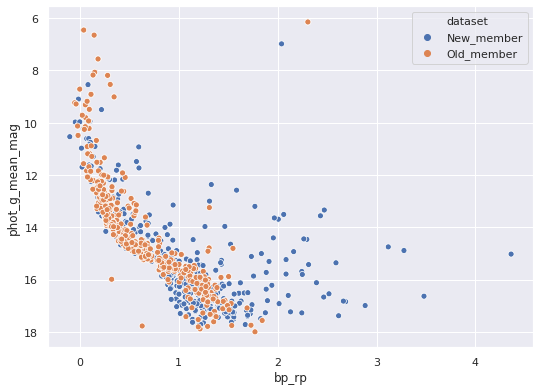

In [0]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

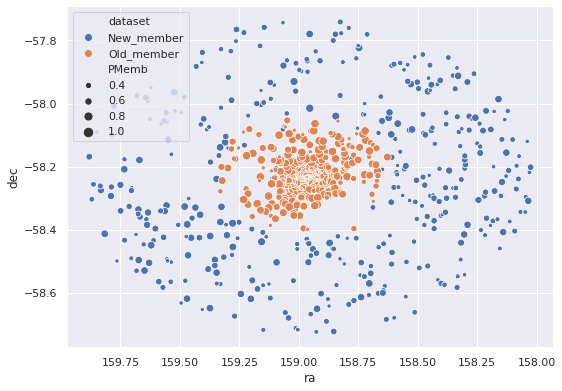

In [0]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

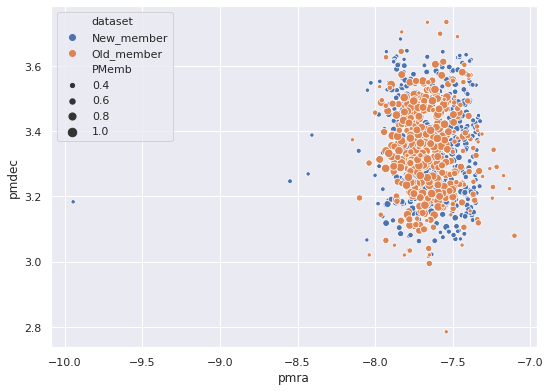

In [0]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)